✅ Cleaned Data Sample:
1 Prabal Docket ID   Source Docket ID       LC ID  \
0    MWUE250512135  MPLS2025053101977  1000272108   
1    MWUE250512134  MPLS2025053101975  1000127559   
2    MAUE250512099             612236  1000168969   
3    MSUE250512096    INC000047117003  1000431568   
4    MAUE250511893             610838  1000168824   

1                                           Customer Bandwidth         WAN IP  \
0                                        MANAGER PNB    2 Mbps  10.110.79.230   
1  M/S BANK OF BARODA, SUN TOWER, 7THFLOOR, EBUSI...    2 Mbps  10.150.92.210   
2                                            UCOBANK    2 Mbps  10.241.33.238   
3                                 STATE BANK OFINDIA    4 Mbps   10.126.45.82   
4                                            UCOBANK    2 Mbps  10.241.34.102   

1 Circle A-SSA A-Exchange                                          A-Address  \
0     UE   RBL     RBLLGJ  PUNJAB NATIONAL BANKLALGANJ BRANCH RAIBARELIRA...   
1     UE   

C:\Users\aliah\AppData\Local\Temp\ipykernel_21376\108643908.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='RFP', order=data['RFP'].value_counts().index, palette='Set2')


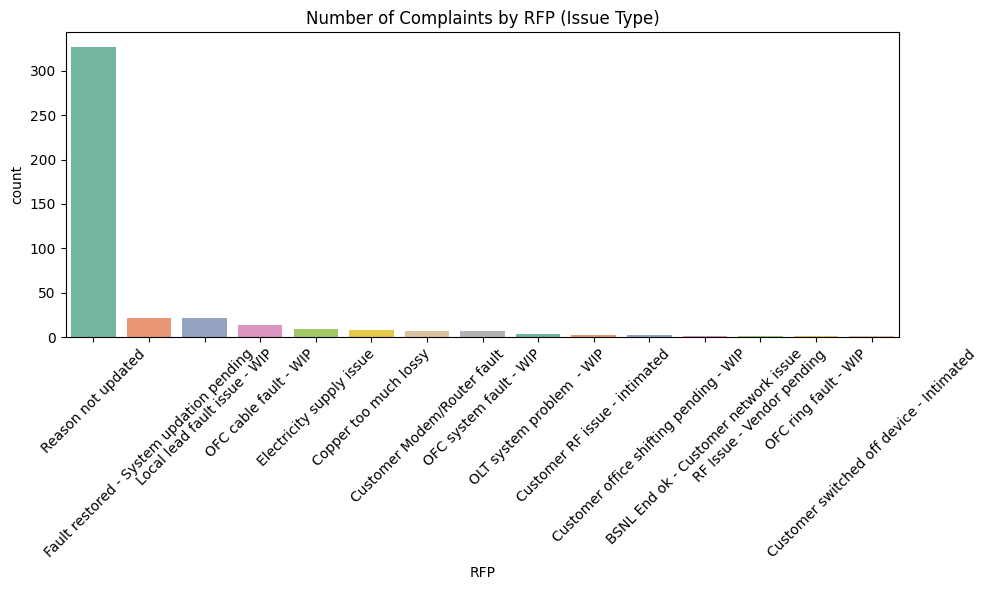

C:\Users\aliah\AppData\Local\Temp\ipykernel_21376\108643908.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Status', palette='pastel')


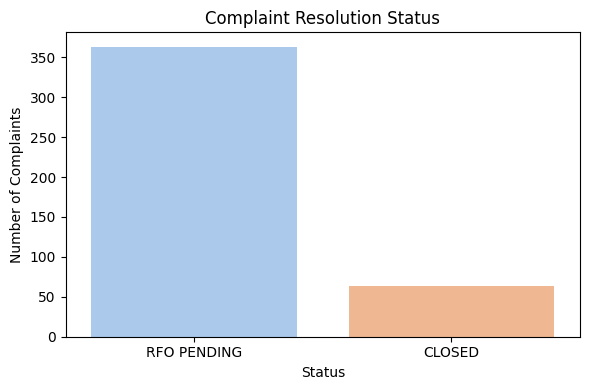

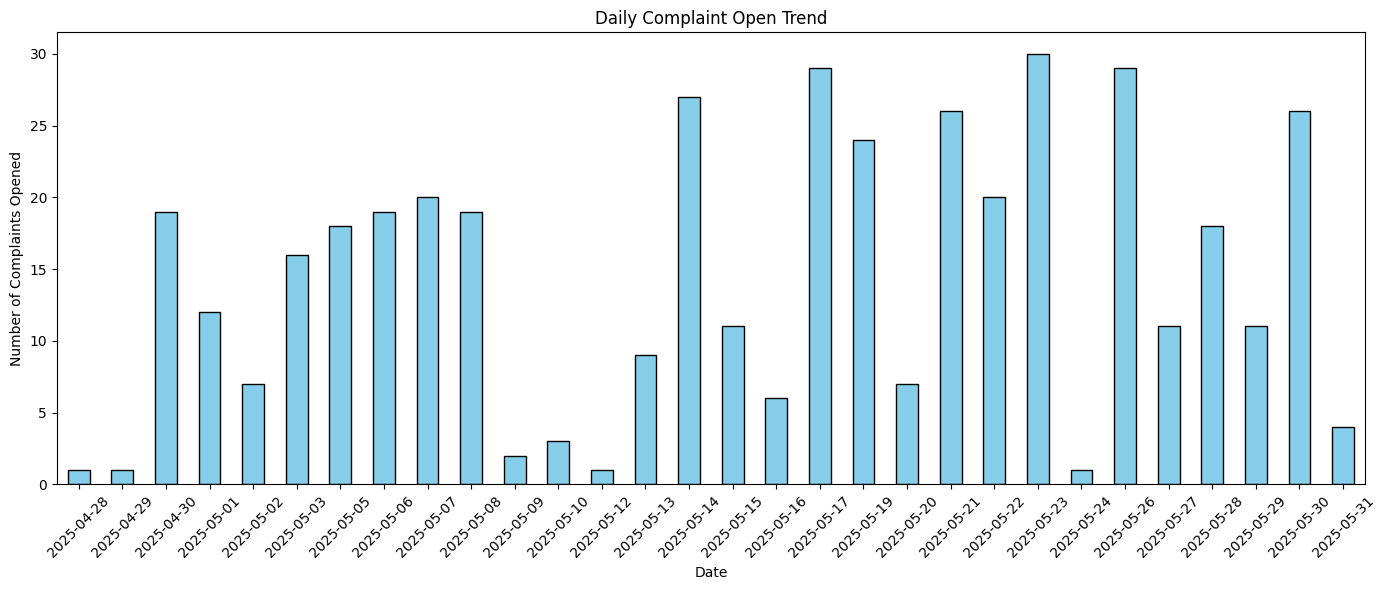

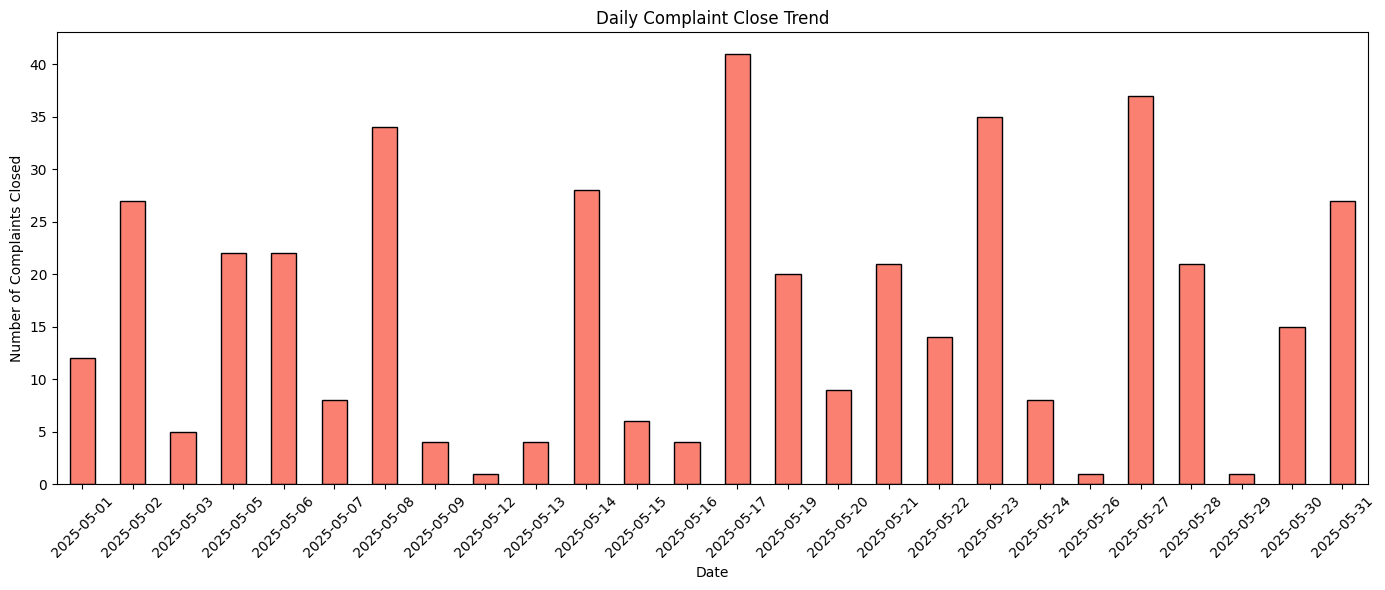

🔹 Average Resolution Time (in days): 0.66

🔹 Top 5 Slowest Resolved Complaints:
    Prabal Docket ID            OpenTime           CloseTime  Resolution_Days
123    MSUE250509231 2025-05-23 13:45:33 2025-05-28 10:48:25         4.876991
147    MSUE250508503 2025-05-22 10:01:41 2025-05-27 05:40:25         4.818565
426    MSUE250408353 2025-04-28 10:01:45 2025-05-02 17:36:25         4.315741
292    MWUE250503825 2025-05-10 08:23:50 2025-05-14 11:26:20         4.126736
291    MWUE250503826 2025-05-10 08:23:51 2025-05-14 11:26:20         4.126725


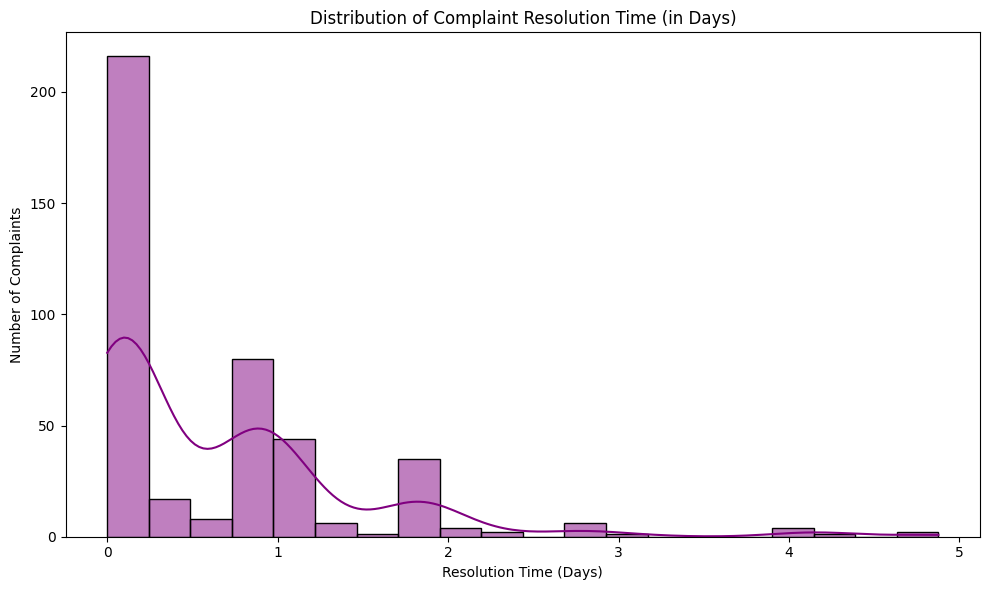

✅ Data with Resolution_Days saved as 'prabal_tickets_with_resolution_time.csv'
🔸 Complaints taking more than 3 days to resolve: 8
🔸 Complaints taking more than 5 days to resolve: 0
✅ Files saved: 'complaints_over_3_days.csv' and 'complaints_over_5_days.csv'


C:\Users\aliah\AppData\Local\Temp\ipykernel_21376\108643908.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="viridis")


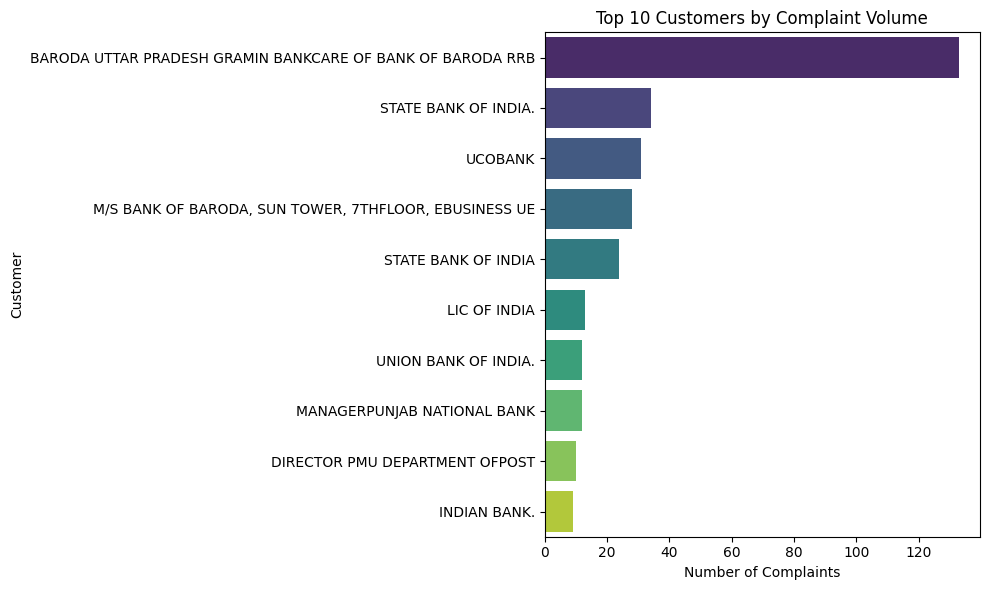

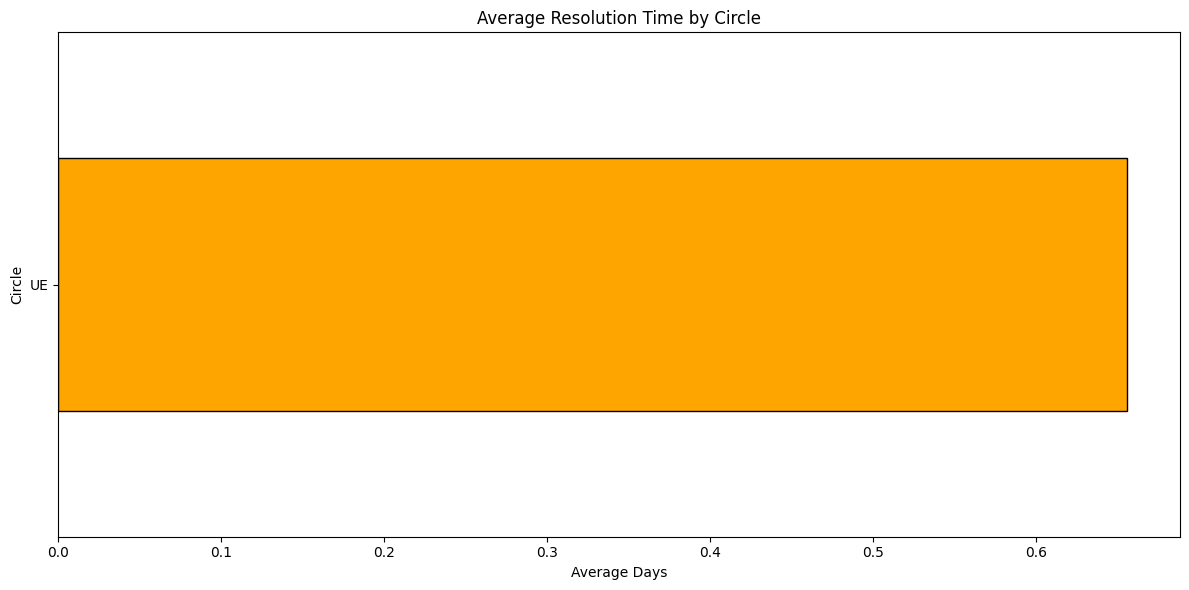

⚠️ Total SLA Breaches (>3 days): 8


C:\Users\aliah\AppData\Local\Temp\ipykernel_21376\108643908.py:172: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Priority', data=data, order=data['Priority'].value_counts().index, palette='coolwarm')


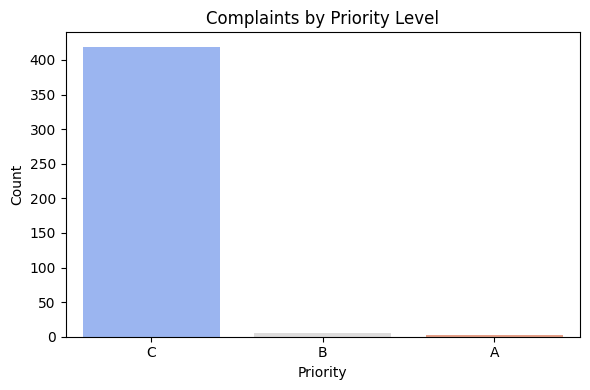

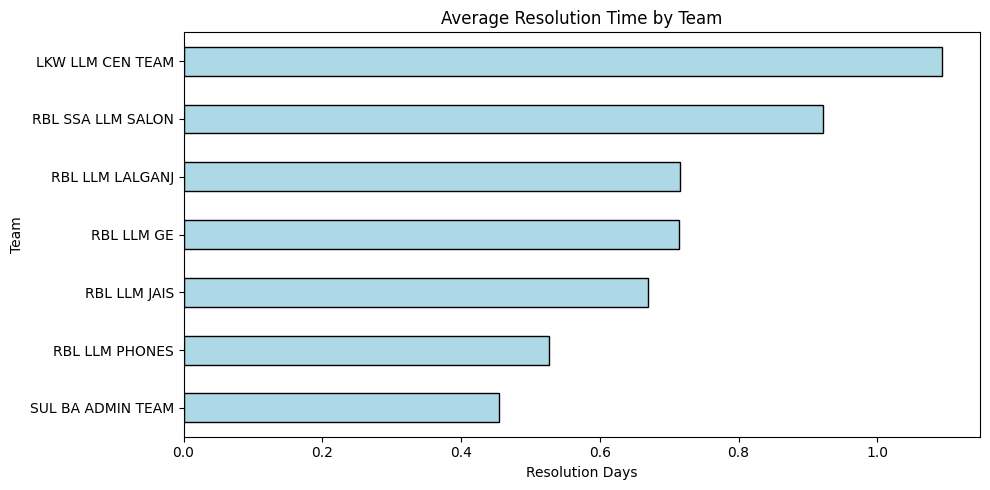

📋 Summary Report:
Total Complaints: 428
Average Resolution Time (days): 0.66
Max Resolution Time: 4.88
Min Resolution Time: 0.0
SLA Breaches (>3 days): 8
Unique Customers: 52
Circles Covered: 1


In [36]:
import pandas as pd

# Step 1: Load raw file without header
raw_data = pd.read_csv("Prabal Plus Resolved Tickets - May 25.csv", header=None)

# Step 2: Extract column names from row 1 (index 1)
column_names = raw_data.iloc[1]

# Step 3: Extract real data starting from row 2
data = raw_data[2:]
data.columns = column_names  # Assign the correct column headers

# Step 4: Drop fully empty rows (if any)
data = data.dropna(how='all')

# Step 5: Reset the index for neatness
data = data.reset_index(drop=True)

# Step 6: Save cleaned data to a new CSV file
data.to_csv("cleaned_prabal_tickets.csv", index=False)

# Step 7: Display basic information for verification
print("✅ Cleaned Data Sample:")
print(data.head())

print("\n🔹 Dataset Info:")
print(data.info())

print("\n🔹 Missing Values per Column:")
print(data.isnull().sum())
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
data = pd.read_csv("cleaned_prabal_tickets.csv")

# Optional: clean up column names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()

# 🔸 1. Complaint Count by RFP (used as Issue Type)
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='RFP', order=data['RFP'].value_counts().index, palette='Set2')
plt.title("Number of Complaints by RFP (Issue Type)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 🔸 2. Complaint Count by Status
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Status', palette='pastel')
plt.title("Complaint Resolution Status")
plt.xlabel("Status")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()


# Ensure OpenTime is datetime
data['OpenTime'] = pd.to_datetime(data['OpenTime'], errors='coerce')

# Drop rows with invalid dates
data = data.dropna(subset=['OpenTime'])

# Extract just the date (not time)
data['OpenDate'] = data['OpenTime'].dt.date

# Count complaints by day
daily_open_counts = data['OpenDate'].value_counts().sort_index()

# Plot daily complaint open trend
plt.figure(figsize=(14,6))
daily_open_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Daily Complaint Open Trend")
plt.xlabel("Date")
plt.ylabel("Number of Complaints Opened")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Ensure CloseTime is datetime
data['CloseTime'] = pd.to_datetime(data['CloseTime'], errors='coerce')

# Drop rows with invalid CloseTime
data = data.dropna(subset=['CloseTime'])

# Extract just the date
data['CloseDate'] = data['CloseTime'].dt.date

# Count complaints closed each day
daily_close_counts = data['CloseDate'].value_counts().sort_index()

# Plot daily complaint close trend
plt.figure(figsize=(14,6))
daily_close_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Daily Complaint Close Trend")
plt.xlabel("Date")
plt.ylabel("Number of Complaints Closed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Load cleaned dataset
data = pd.read_csv("cleaned_prabal_tickets.csv")

# Step 1: Convert OpenTime and CloseTime to datetime
data['OpenTime'] = pd.to_datetime(data['OpenTime'], errors='coerce')
data['CloseTime'] = pd.to_datetime(data['CloseTime'], errors='coerce')

# Step 2: Calculate resolution time in days
data['Resolution_Days'] = (data['CloseTime'] - data['OpenTime']).dt.total_seconds() / (24 * 3600)

# Step 3: Summary stats
print("🔹 Average Resolution Time (in days):", round(data['Resolution_Days'].mean(), 2))

print("\n🔹 Top 5 Slowest Resolved Complaints:")
print(data[['Prabal Docket ID', 'OpenTime', 'CloseTime', 'Resolution_Days']]
      .sort_values(by='Resolution_Days', ascending=False).head())

# Step 4: Plot the distribution of resolution times
plt.figure(figsize=(10,6))
sns.histplot(data['Resolution_Days'].dropna(), bins=20, kde=True, color='purple')
plt.title("Distribution of Complaint Resolution Time (in Days)")
plt.xlabel("Resolution Time (Days)")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()

# Step 5 (Optional): Save updated data with Resolution_Days
data.to_csv("prabal_tickets_with_resolution_time.csv", index=False)
print("✅ Data with Resolution_Days saved as 'prabal_tickets_with_resolution_time.csv'")
# Define thresholds
threshold_3 = 3
threshold_5 = 5

# Complaints taking more than 3 days
over_3_days = data[data['Resolution_Days'] > threshold_3]
print(f"🔸 Complaints taking more than {threshold_3} days to resolve: {len(over_3_days)}")

# Complaints taking more than 5 days
over_5_days = data[data['Resolution_Days'] > threshold_5]
print(f"🔸 Complaints taking more than {threshold_5} days to resolve: {len(over_5_days)}")

# Optional: save them to CSVs
over_3_days.to_csv("complaints_over_3_days.csv", index=False)
over_5_days.to_csv("complaints_over_5_days.csv", index=False)
print("✅ Files saved: 'complaints_over_3_days.csv' and 'complaints_over_5_days.csv'")
top_customers = data['Customer'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="viridis")
plt.title("Top 10 Customers by Complaint Volume")
plt.xlabel("Number of Complaints")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()
circle_resolution = data.groupby('Circle')['Resolution_Days'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
circle_resolution.plot(kind='barh', color='orange', edgecolor='black')
plt.title("Average Resolution Time by Circle")
plt.xlabel("Average Days")
plt.ylabel("Circle")
plt.tight_layout()
plt.show()

sla_breached = data[data['Resolution_Days'] > 3]

print(f"⚠️ Total SLA Breaches (>3 days): {len(sla_breached)}")

# Save
sla_breached.to_csv("sla_breach_complaints.csv", index=False)
plt.figure(figsize=(6,4))
sns.countplot(x='Priority', data=data, order=data['Priority'].value_counts().index, palette='coolwarm')
plt.title("Complaints by Priority Level")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
team_perf = data.groupby('Team')['Resolution_Days'].mean().sort_values()

plt.figure(figsize=(10,5))
team_perf.plot(kind='barh', color='lightblue', edgecolor='black')
plt.title("Average Resolution Time by Team")
plt.xlabel("Resolution Days")
plt.tight_layout()
plt.show()
summary = {
    'Total Complaints': len(data),
    'Average Resolution Time (days)': round(data['Resolution_Days'].mean(), 2),
    'Max Resolution Time': round(data['Resolution_Days'].max(), 2),
    'Min Resolution Time': round(data['Resolution_Days'].min(), 2),
    'SLA Breaches (>3 days)': len(sla_breached),
    'Unique Customers': data['Customer'].nunique(),
    'Circles Covered': data['Circle'].nunique(),
}
print("📋 Summary Report:")
for k, v in summary.items():
    print(f"{k}: {v}")